<a href="https://colab.research.google.com/github/MonitSharma/Machine-Learning/blob/main/Remote_Sensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EES 403: Remote Sensing and GIS**

## Image Processing and Analysis

Many image processing and analysis techniques have been developed to aid the interpretation of remote sensing images and to extract as much information as possible from the images. The choice of specific techniques or algorithms to use depends on the goals of each individual project. In this section, we will examine some procedures commonly used in analysing/interpreting remote sensing images. 

## Image Enhancement

In order to aid visual interpretation, visual appearance of the objects in the image can be improved by image enhancement techniques such as grey level stretching to improve the contrast and spatial filtering for enhancing the edges.

It is useful to examine the image Histograms before performing any image enhancement. The $x$-axis of the histogram is the range of the available digital numbers, i.e. $0$ to $255$. The $y$-axis is the number of pixels in the image having a given digital number

## **Problem Statement**

### Implement different contrast enhancement programs over a remote sensing data (using linear, non-linear contrast stretch)

In [1]:
# importing the necessary libraries

import numpy as np                        # numpy used for numerical calculations
import cv2 as cv                          # open-cv package for Image functionalities
from skimage import io                    # skimage library for loading images (alternative to open-cv)
import matplotlib.pyplot as plt           # plotting histogram and pictures
from matplotlib.colors import NoNorm      # Dummy replacement for Normalize, for the case where we want to use indices directly in a ScalarMappable

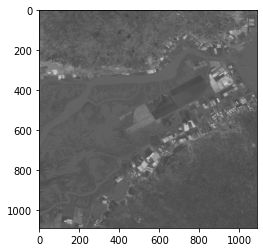

In [2]:
# uploading and visualizing the image
image = io.imread('Image.tif', as_gray=False)    # takes the image as an arguement
plt.imshow(image, cmap='gray', norm = NoNorm())  # normalize the pixels

## Plotting the Histogram
It is useful to examine the image Histograms before performing any image enhancement. The x-axis of the histogram is the range of the available digital numbers, i.e. 0 to 255. The y-axis is the number of pixels in the image having a given digital number.

We will use the  ```plt.hist()``` command from the matplotlib library to plot the Histogram.



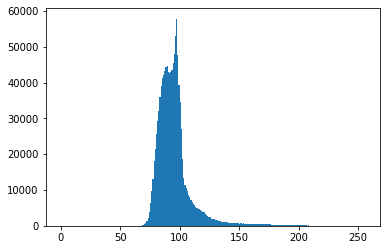

In [3]:
plt.hist(image.ravel(),256,[0,256])             # ravel() is equivalent of reshape(-1).
plt.show()

Note that the minimum digital number for each band is not zero. Each histogram is shifted to the right by a certain amount. This shift is due to the atmospheric scattering component adding to the actual radiation reflected from the ground. The shift is particular large for the XS1 band compared to the other two bands due to the higher contribution from Rayleigh scattering for the shorter wavelength.

(array([2.10000e+01, 1.49000e+02, 1.59800e+03, 3.76700e+03, 8.81500e+03,
        1.29970e+04, 2.97260e+04, 1.16252e+05, 7.72683e+05, 2.39913e+05]),
 array([  1.,  20.,  39.,  58.,  77.,  96., 115., 134., 153., 172., 191.]),
 <a list of 10 Patch objects>)

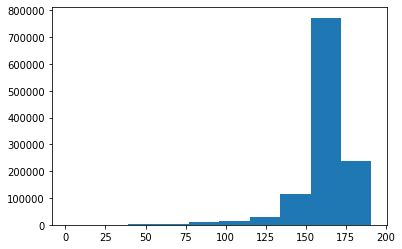

In [4]:
plt.hist(image.flatten()*255)

The maximum digital number of each band is also not 255. The sensor's gain factor has been adjusted to anticipate any possibility of encountering a very bright object.

## **Linear Stretch**

Linear stretching is the simplest transform. If the data histogram is relatively uniform, then a linear stretch where the display values are linearly spaced in data values between some minimum and maximum works well. 

<li> Create a histogram of the original image
<li> Set new maximum and new minimum values from the image matrix.
    
<li> Calculate number of bins in the original histogram where value of bins = ( OMAX – OMIN )
<li> Calculate spacing for a new histogram so space = ( NMAX – NMIN ) / ( OMAX – OMIN )
<li> Create a new histogram with corresponding positions for new bins ( Nb ) represented by
<li> Use new histogram to create new image


In [17]:
'''
Check the min and max value in the Image matrix
generated for the specific image
'''
print("The Minimim Pixel Value",image.min())
print("The Maximum Pixel Value",image.max())

The Minimim Pixel Value 65
The Maximum Pixel Value 255


In [11]:
## finding the ratio

ratio = ((255-0)/(image.max()*255-image.min()*255))        # 255 is the bin size
print("The Ratio is:",ratio)

The Ratio is: 0.005263157894736842


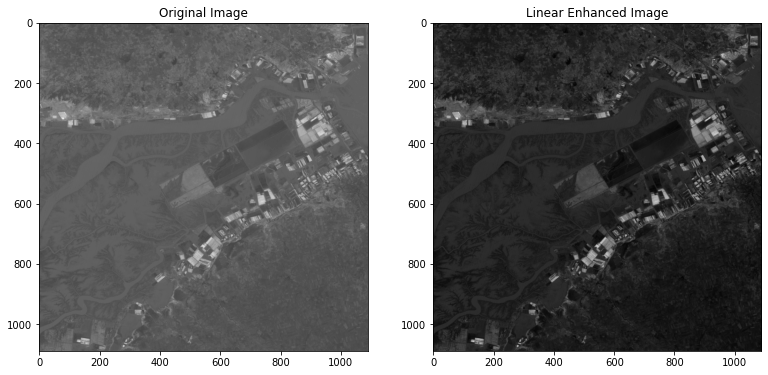

In [20]:
'''
Plotting the enhanced and the inital image side-by-side
for a better contrast
'''

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image, cmap="gray", norm=NoNorm());
plt.subplot(1,3,2)
image_enh = (image - np.min(image))*ratio
plt.title("Linear Enhanced Image")
plt.imshow (image_enh, cmap="gray", norm=NoNorm());

In [25]:
'''
Visualizing the matrix for the image
'''
print("The Matrix for Original Image \n:",image)


print("-----------------------------------------------------------------")
print("*****************************************************************")
print("------------------------------------------------------------------")
print("The Matrix for the Enhanced Image \n", image_enh)

The Matrix for Original Image 
: [[ 98  94  96 ...  97  97  98]
 [102  95  95 ...  98  97  97]
 [101  97  95 ...  98  97  98]
 ...
 [ 97  86  89 ...  75  79  81]
 [ 93  86  90 ...  75  79  82]
 [ 92  82  88 ...  75  79  81]]
-----------------------------------------------------------------
*****************************************************************
------------------------------------------------------------------
The Matrix for the Enhanced Image 
 [[0.17368421 0.15263158 0.16315789 ... 0.16842105 0.16842105 0.17368421]
 [0.19473684 0.15789474 0.15789474 ... 0.17368421 0.16842105 0.16842105]
 [0.18947368 0.16842105 0.15789474 ... 0.17368421 0.16842105 0.17368421]
 ...
 [0.16842105 0.11052632 0.12631579 ... 0.05263158 0.07368421 0.08421053]
 [0.14736842 0.11052632 0.13157895 ... 0.05263158 0.07368421 0.08947368]
 [0.14210526 0.08947368 0.12105263 ... 0.05263158 0.07368421 0.08421053]]


## **Grey Level Slicing**

The image can be enhanced by a simple linear grey-level stretching. In this method, a level threshold value is chosen so that all pixel values below this threshold are mapped to zero. An upper threshold value is also chosen so that all pixel values above this threshold are mapped to 255. All other pixel values are linearly interpolated to lie between 0 and 255. 

In [45]:
# checking the size of the original image matrix

x,y = image.shape
print("The number of rows are:",x)
print("The number of columns are:",y)

The number of rows are: 1089
The number of columns are: 1089


In [46]:
'''
We will create an empty matrix **z** with the same number of rows and columns
as the original image, then we will iterate over the entire image matrix using 
for loops and check whether the values satisfy our criteria or not(with background)
'''

z = np.zeros((x,y))
print("The empty Z-matrix:",z)

# iterate over the entire matrix

for i in range(0,x):
  for j in range(0,y):
    if(image[i][j]>=60 and image[i][j]<=180):
      z[i][j] = 255-image[i][j]
    else:
      z[i][j] = 255

The empty Z-matrix: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
'''
Visualizing the matrix for the image
'''
print("The Matrix for Original Image \n:",image)


print("-----------------------------------------------------------------")
print("*****************************************************************")
print("------------------------------------------------------------------")
print("The updated Z-matrix \n", z)

The Matrix for Original Image 
: [[ 98  94  96 ...  97  97  98]
 [102  95  95 ...  98  97  97]
 [101  97  95 ...  98  97  98]
 ...
 [ 97  86  89 ...  75  79  81]
 [ 93  86  90 ...  75  79  82]
 [ 92  82  88 ...  75  79  81]]
-----------------------------------------------------------------
*****************************************************************
------------------------------------------------------------------
The updated Z-matrix 
 [[157. 161. 159. ... 158. 158. 157.]
 [153. 160. 160. ... 157. 158. 158.]
 [154. 158. 160. ... 157. 158. 157.]
 ...
 [158. 169. 166. ... 180. 176. 174.]
 [162. 169. 165. ... 180. 176. 173.]
 [163. 173. 167. ... 180. 176. 174.]]


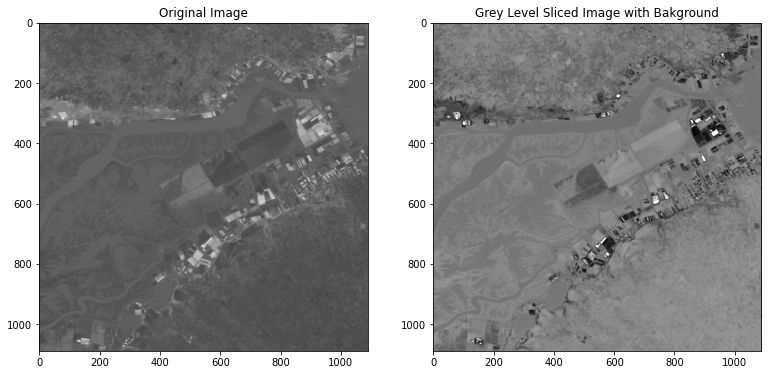

In [48]:
'''
Plotting the enhanced and the inital image side-by-side
for a better contrast
'''

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image, cmap="gray", norm=NoNorm())
plt.subplot(1,3,2)

plt.title("Grey Level Sliced Image with Bakground")
plt.imshow (z, cmap="gray")

#### *Saving the Image in our Local Device*

Use the ``` cv.imwrite()``` function to save images to your local device



In [49]:
cv.imwrite('Linear_Stretched.png',image_enh)
cv.imwrite('Grey_Level_Sliced.png',z)

True

In [51]:
'''
We will create an empty matrix **w** with the same number of rows and columns
as the original image, then we will iterate over the entire image matrix using 
for loops and check whether the values satisfy our criteria or not (without background)
'''

w = np.zeros((x,y))
print("The empty W-matrix:",w)

# iterate over the entire matrix

for i in range(0,x):
  for j in range(0,y):
    if(image[i][j]>=50 and image[i][j]<=150):
      w[i][j] = 255-image[i][j]
    else:
      w[i][j] = image[i][j]

The empty W-matrix: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [52]:
'''
Visualizing the matrix for the image
'''
print("The Matrix for Original Image \n:",image)


print("-----------------------------------------------------------------")
print("*****************************************************************")
print("------------------------------------------------------------------")
print("The updated W-matrix \n", w)

The Matrix for Original Image 
: [[ 98  94  96 ...  97  97  98]
 [102  95  95 ...  98  97  97]
 [101  97  95 ...  98  97  98]
 ...
 [ 97  86  89 ...  75  79  81]
 [ 93  86  90 ...  75  79  82]
 [ 92  82  88 ...  75  79  81]]
-----------------------------------------------------------------
*****************************************************************
------------------------------------------------------------------
The updated W-matrix 
 [[157. 161. 159. ... 158. 158. 157.]
 [153. 160. 160. ... 157. 158. 158.]
 [154. 158. 160. ... 157. 158. 157.]
 ...
 [158. 169. 166. ... 180. 176. 174.]
 [162. 169. 165. ... 180. 176. 173.]
 [163. 173. 167. ... 180. 176. 174.]]


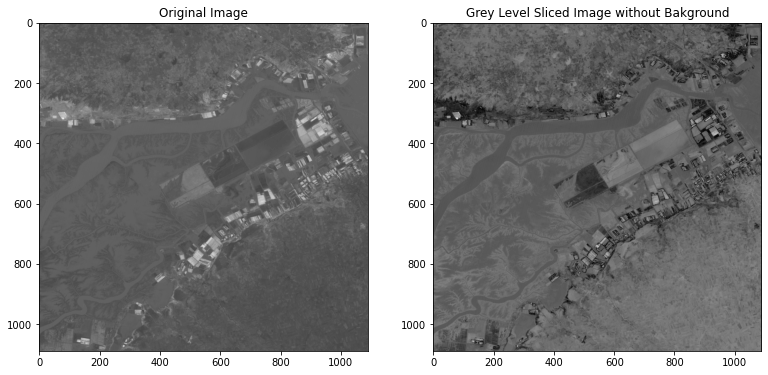

In [53]:
'''
Plotting the enhanced and the inital image side-by-side
for a better contrast
'''

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image, cmap="gray", norm=NoNorm())
plt.subplot(1,3,2)

plt.title("Grey Level Sliced Image without Bakground")
plt.imshow (w, cmap="gray")

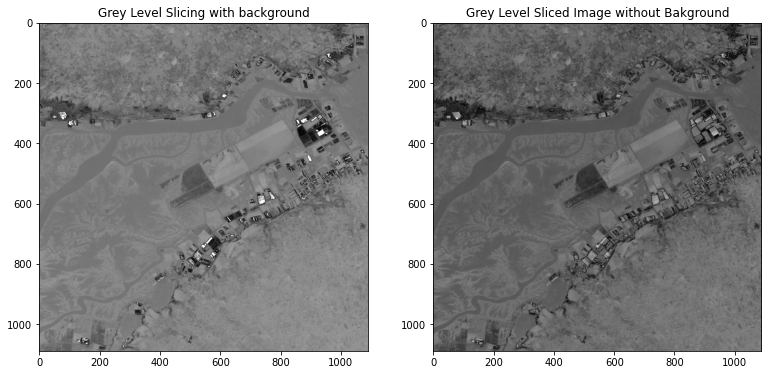

In [54]:
'''
Plotting the enhanced and the inital image side-by-side
for a better contrast
'''

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Grey Level Slicing with background")
plt.imshow(z, cmap="gray")
plt.subplot(1,3,2)

plt.title("Grey Level Sliced Image without Bakground")
plt.imshow (w, cmap="gray")

## **Gamma Transformation**

Gamma correction controls the overall brightness of an image. Images which are not properly
 corrected can look either bleached out, or too dark. Varying the amount of gamma correction changes not only the brightness, but also the ratios of red to green to blue.


Power-law (gamma) transformations can be mathematically expressed as


**$s = cr^{\gamma}$** 




 
 
 
Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings. This is done because our eyes perceive images in a gamma-shaped curve, whereas cameras capture images in a linear fashion.

In pseudocode gamma correction would look like :     


```
gammaCorrection = 1/gamma
colour = GetPixelColour(x,y)
newRed = 255 * (Red(colour) / 255)^ gamma

newGreen = 255 * (Green(colour) / 255)^ gamma

newBlue = 255 * (Blue(colour) / 255)^ gamma
```

The range of $\gamma$ will depend on the application

In [55]:
'''
A function that takes the Image matrix and the value of Gamma 
and give us the Gamma transformed image in return
'''

def gammaCorrection(img,gamma):
  invGamma = 1/ gamma

  table = [((i/255) ** invGamma)* 255 for i in range(256)]
  table = np.array(table, np.uint8)

  return cv.LUT(img,table)




In [56]:
## doing the gamma transformation

imag = cv.imread('image2.PNG')

## aplly the gama correction function

gammaImg = gammaCorrection(imag, 0.5)

## Plotting the image



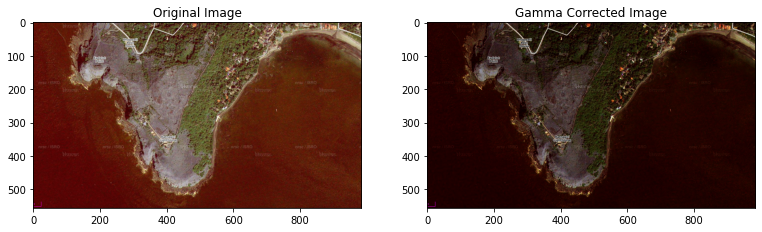

In [59]:
'''
Plotting the enhanced and the inital image side-by-side
for a better contrast
'''

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(imag, cmap="gray")
plt.subplot(1,3,2)

plt.title("Gamma Corrected Image")
plt.imshow (gammaImg, cmap="gray")

(array([ 28158.,   4320.,  11555.,  28702.,  89725., 186223., 444305.,
        126769., 206398., 515157.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

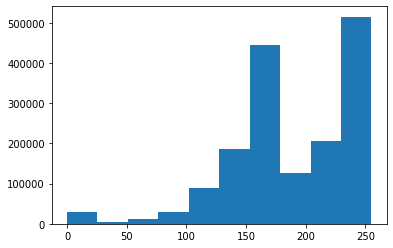

In [60]:
## plotting the Histogram for the original Image

plt.hist(imag.flatten()*255)

(array([388521.,   1466.,   2344.,   3820.,   8145.,  18069.,  45079.,
        132316., 500726., 540826.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

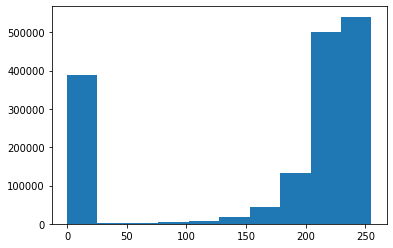

In [62]:
## plotting the Histogram for the gamma corrected Image

plt.hist(gammaImg.flatten()*255)

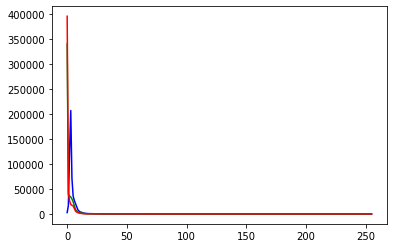

In [64]:
color = ('b','g','r')
for i,col in enumerate (color):
  histr= cv.calcHist([gammaImg],[i],None,[256],[0,2560])
  plt.plot(histr,color=col)
  plt.show

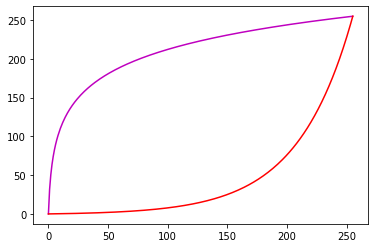

In [65]:
r=np.arange(0,256)
c= 255/(np.log(1+255))
y=c*np.log(1+r)
c2=255/(np.log(1+255))
y2=np.exp(r)**(1/c)-1
# Plot the gamma curve

plt.plot(r,y,color='m');
plt.plot(r,y2,color= 'r')



## **Log and Inverse log stretch**

Log Curve maps a narrow range of low gray-level values in the input image into a wider range of the output levels.

Used to expand the values of dark pixels in an image while compressing the higher-level values.


Inverse Log Transformation do opposite of the log transformation .

Used to expand the values of high pixels in an image while compressing the darker-level values.



### Log Transformation

Logarithmic transformation of an image is one of the gray level image transformations. Log transformation of an image means replacing all pixel values, present in the image, with its logarithmic values. Log transformation is used for image enhancement as it expands dark pixels of the image as compared to higher pixel values.

The formula for applying log transformation in an image is,



```
S = c * log(1+r)

where,
R = input pixel value,
C = scaling constant and
S = output pixel value
```

The value of ‘c’ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating ‘c’ is as follows:



```
c = 255 / (log (1 + max_input_pixel_value))
```

When we apply log transformation in an image and any pixel value is ‘0’ then its log value will become infinite. That’s why we are adding ‘1’ to each pixel value at the time of log transformation so that if any pixel value is ‘0’, it will become ‘1’ and its log value will be ‘0’.



In [66]:
# read the image

img = io.imread('Image.tif')

'''
Apply the formula for the log transform 
'''

c = 255/(np.log(1+255))
log_image = c*np.log(2+img)
log_image = np.array(log_image,dtype= np.uint8)

In [67]:

'''
Visualizing the matrix for the image
'''
print("The Matrix for Original Image \n:",img)


print("-----------------------------------------------------------------")
print("*****************************************************************")
print("------------------------------------------------------------------")
print("The updated Log-matrix \n", log_image)

The Matrix for Original Image 
: [[ 98  94  96 ...  97  97  98]
 [102  95  95 ...  98  97  97]
 [101  97  95 ...  98  97  98]
 ...
 [ 97  86  89 ...  75  79  81]
 [ 93  86  90 ...  75  79  82]
 [ 92  82  88 ...  75  79  81]]
-----------------------------------------------------------------
*****************************************************************
------------------------------------------------------------------
The updated Log-matrix 
 [[211 209 211 ... 211 211 211]
 [213 210 210 ... 211 211 211]
 [213 211 210 ... 211 211 211]
 ...
 [211 205 207 ... 199 202 203]
 [209 205 208 ... 199 202 203]
 [209 203 207 ... 199 202 203]]


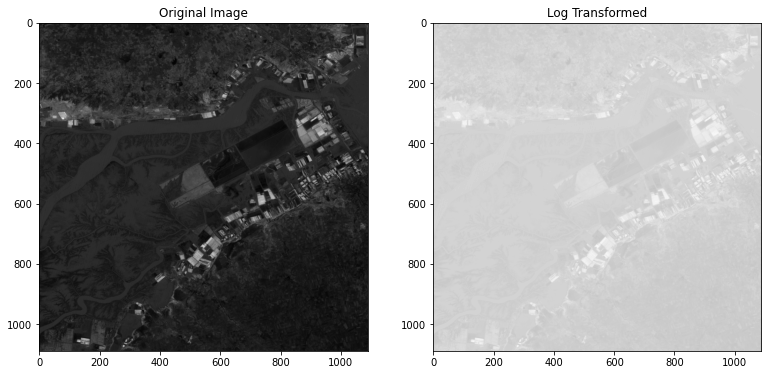

In [68]:
'''
Plotting the enhanced and the inital image side-by-side
for a better contrast
'''

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.subplot(1,3,2)

plt.title("Log Transformed")
plt.imshow (log_image, cmap="gray")

In [75]:
'''
Using different set of Parameters
'''

# read the image

img2 = io.imread('imgg2.tif')

'''
Apply the formula for the log transform 
'''

c = 255/(np.log(1+255))
log_image2 = c*np.log(1+img2)
log_image2 = np.array(log_image2,dtype= np.uint8)

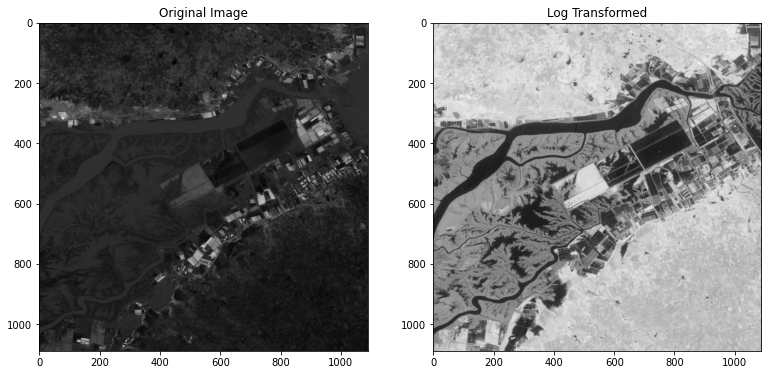

In [76]:
'''
Plotting the enhanced and the inital image side-by-side
for a better contrast
'''

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.subplot(1,3,2)

plt.title("Log Transformed")
plt.imshow (log_image2, cmap="gray")

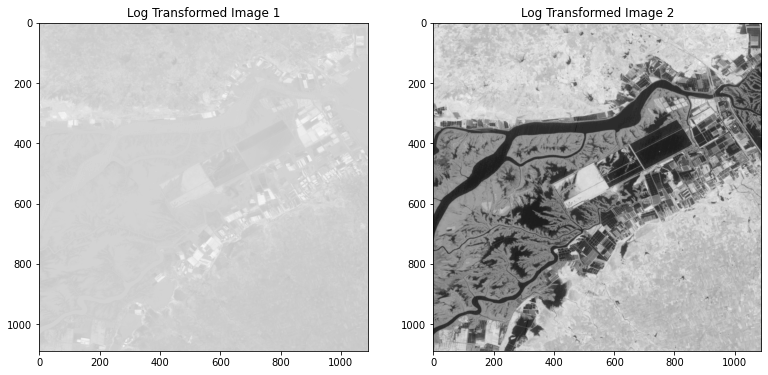

In [78]:
'''
Comparing Two log transformed Images
'''

'''
Plotting the enhanced and the inital image side-by-side
for a better contrast
'''

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Log Transformed Image 1")
plt.imshow(log_image, cmap="gray")
plt.subplot(1,3,2)

plt.title("Log Transformed Image 2")
plt.imshow (log_image2, cmap="gray")

### Inverse Log Transform

Inverse Log Transformation is opposite to that of Log transformation.



```
S = c * inv_log (1 + r)

where,
R = input pixel value,
C = scaling constant and
S = output pixel value
```

and the value of 'c' is 


```
c = 255 / (log (1 + max_input_pixel_value))
```





In [80]:
'''
Load the Image
'''
img3 = io.imread('/imagee.tif')

In [81]:
'''
Formula for the inverse Log Transform
'''

c=255/(np.log(1+255))
inv_log_image= np.exp(img3**1/c)-1
inv_log_image =np.array(inv_log_image, dtype=np.uint8)

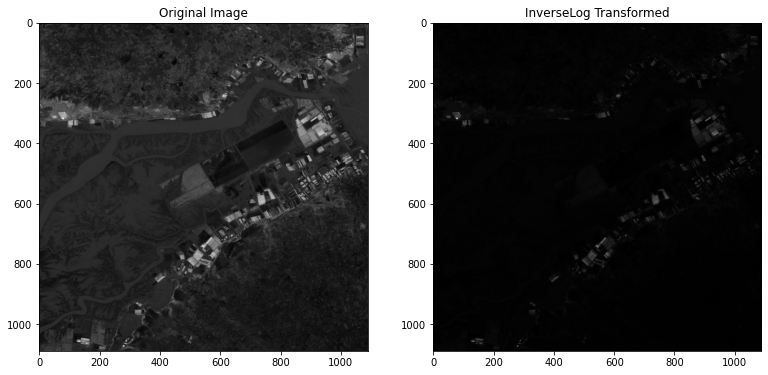

In [82]:

'''
Plotting the enhanced and the inital image side-by-side
for a better contrast
'''

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img3, cmap="gray")
plt.subplot(1,3,2)

plt.title("InverseLog Transformed")
plt.imshow (inv_log_image, cmap="gray")

In [83]:
'''

Doing it for Different Value of parameters
'''
c=255/(np.log(1+255))
inv_log_image2= np.exp(img3**1/c)-1
inv_log_image2 =np.array(inv_log_image2, dtype=np.uint8)


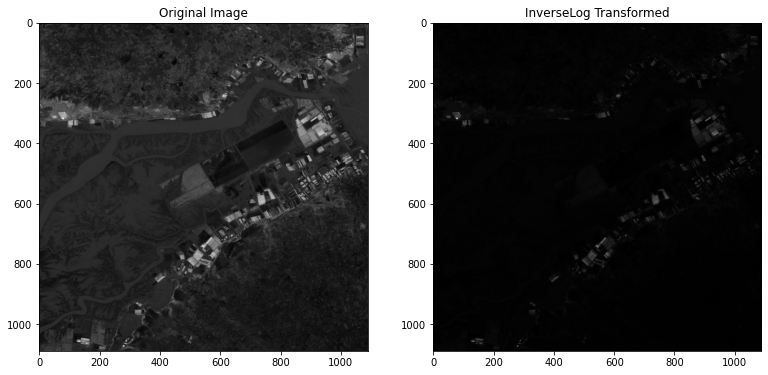

In [84]:

'''
Plotting the enhanced and the inital image side-by-side
for a better contrast
'''

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img3, cmap="gray")
plt.subplot(1,3,2)

plt.title("InverseLog Transformed")
plt.imshow (inv_log_image2, cmap="gray")

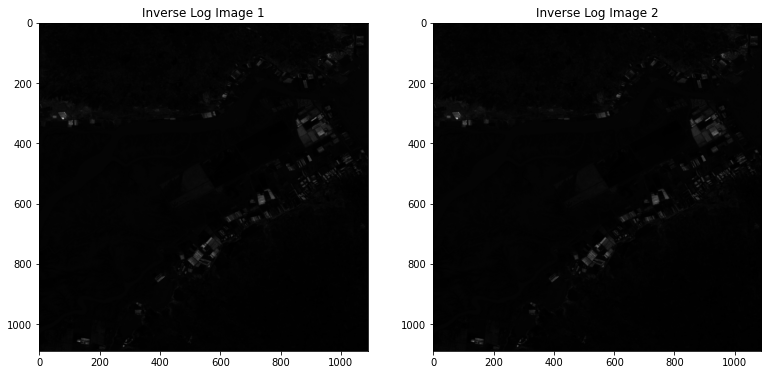

In [85]:

'''
Comparing both inverse log images
Plotting the enhanced and the inital image side-by-side
for a better contrast
'''

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Inverse Log Image 1")
plt.imshow(inv_log_image, cmap="gray")
plt.subplot(1,3,2)

plt.title("Inverse Log Image 2")
plt.imshow (inv_log_image2, cmap="gray")

## **Pseudo codes**


*1. Get input image from user, p*


*2. Assess   the   quality   of   image   and   convert   to grayscale, $p_2 = \frac{(p_R+ p_G + p_B)}{3}$*

*3. Get selected operation command from user*

*4. Initialize variables*



```
im = im2double(p2)
set highest gray level, L = 256
compute c =(L -1)/log(L)
```



```
[m,n]=size(p2)
for i=1:m
  for j=1:n
```

*5. Perform Operations*

*Case 1: Image Negative*
```
compute the equation,
s(i,j)=(L-1)-p2(i,j)
End
GOTO 7
```
*Case 2:Power-Law Transform*
```
set arbitrary constant,c = 2
Get gamma, y value from user
compute s(i, j) = c * im(i, j).^ y
End
GOTO 7
```
*Case 3: Log Transform*
```
compute s(i,j) = c*log(1+im)
End
GOTO 7
```

*Case 4: Inverse Log Transform*
```
compute s(i,j) = exp(im^c)-1
End
GOTO 7
```

*Case 5: Gray Level Slicing*
```
compute using the condition
ifp2(i,j) >= 227
      s(i,j) = 255;
  else
      s(i,j) = 0;
  end if
End
GOTO 7
```
*Case 6: Contrast stretching*
```
set  initial  value  for  slope  of  the  function,E    and  the mid-line to switch from dark values to light values, m
m= 0.2
E=4
compute s= 1./(1+(m./(im2+eps)).^E)
Get update input of E or m from userupdate variables
End
GOTO 7
```
*7. Display image*


*8. Prompt user to save*


*9. End*

